<a href="https://colab.research.google.com/github/HeyWinTomsy/NM/blob/main/%D0%9F%D1%96%D0%B4%D1%81%D1%83%D0%BC%D0%BA%D0%BE%D0%B2%D0%B0_%D1%80%D0%BE%D0%B1%D0%BE%D1%82%D0%B0_%D0%90%D0%BD%D1%82%D1%80%D0%BE%D0%BF%D0%BE%D0%B2_%D0%9D%D0%B0%D0%B7%D0%B0%D1%80.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [176]:
import numpy as np
import matplotlib.pyplot as plt
from sympy import symbols, expand
from math import factorial
import matplotlib.pyplot as plt
from scipy.interpolate import lagrange
from scipy.interpolate import CubicSpline

In [177]:
x =np.array([0,0.2,0.5,0.9,1.3,1.6])
y =np.array([0,0.182322,0.405465,0.641854,0.832909,0.955511])

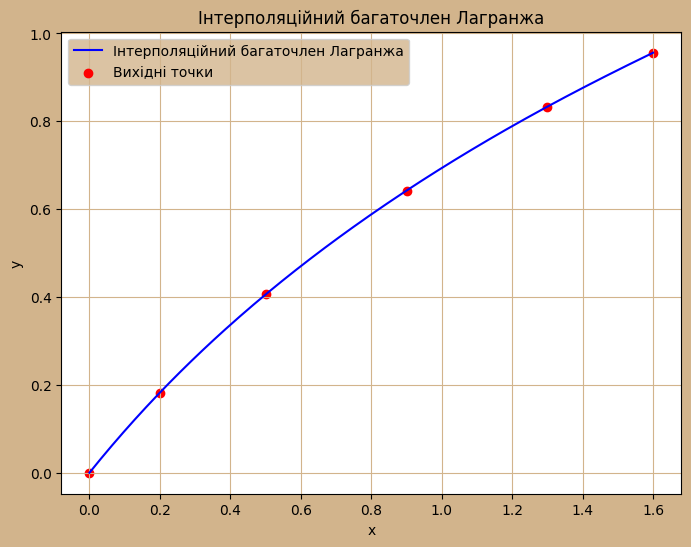

In [178]:
poly = lagrange(x, y)

x2= np.linspace(min(x), max(x), 200)
y2= poly(x2)

plt.figure(figsize=(8, 6),facecolor="tan",edgecolor="brown")
plt.plot(x2, y2, label='Інтерполяційний багаточлен Лагранжа', color='blue')
plt.scatter(x, y, color='red', label='Вихідні точки')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Інтерполяційний багаточлен Лагранжа')
plt.legend(facecolor='tan')
plt.grid(True,c='tan')
plt.show()


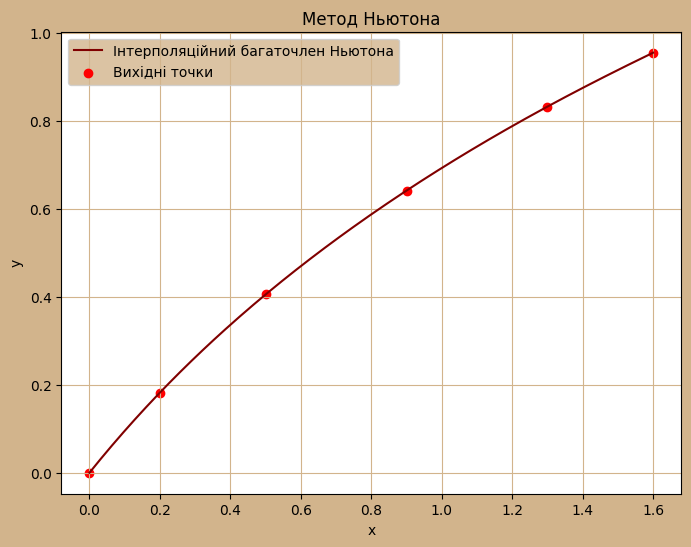

In [187]:
n = len(x)
delt_y = np.zeros((n, n))
delt_y[:, 0] = y

for j in range(1, n):
    for i in range(n - j):
        delt_y[i][j] = (delt_y[i + 1][j - 1] - delt_y[i][j - 1]) / (x[i + j] - x[i])

def newton_interp(x_data, x, diff, val):
    n = len(x_data)
    res = delt_y[0][0]
    term = 1.0
    for i in range(1, n):
        term *= (val - x_data[i - 1])
        res += delt_y[0][i] * term
    return res

x3 = np.linspace(min(x), max(x), 200)
y3 = [newton_interp(x, x, delt_y, xi) for xi in x3]

plt.figure(figsize=(8, 6),facecolor="tan",edgecolor="brown")
plt.plot(x3, y3, label="Інтерполяційний багаточлен Ньютона", color="maroon")
plt.scatter(x, y, color="red", label="Вихідні точки")
plt.title("Метод Ньютона")
plt.xlabel("x")
plt.ylabel("y")
plt.legend(facecolor='tan')
plt.grid(True,c='tan')
plt.show()

Таблиця кінцевих різниць:
[[ 0.      0.1823  0.0408 -0.0276 -0.031   0.0665]
 [ 0.1823  0.2231  0.0132 -0.0586  0.0355  0.    ]
 [ 0.4055  0.2364 -0.0453 -0.0231  0.      0.    ]
 [ 0.6419  0.1911 -0.0685  0.      0.      0.    ]
 [ 0.8329  0.1226  0.      0.      0.      0.    ]
 [ 0.9555  0.      0.      0.      0.      0.    ]]

Перша похідна y'(0.1) ≈ 0.802
Друга похідна y''(0.1) ≈ 0.999


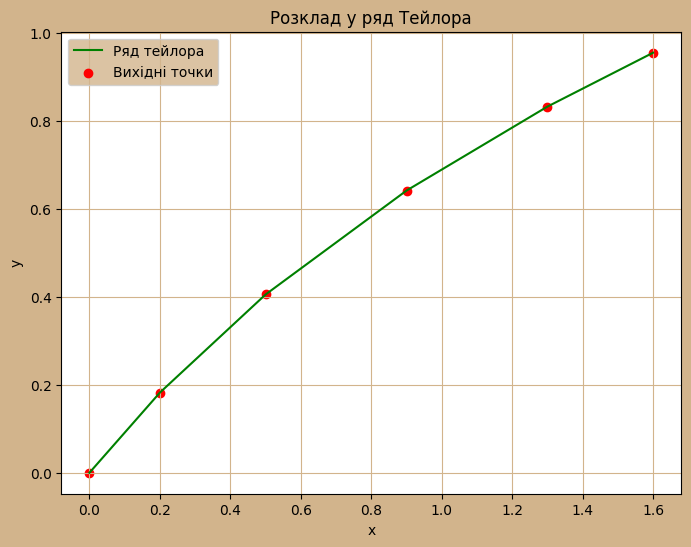

In [183]:
# Крок таблиці
h = x[1] - x[0]

# Обчислення кінцевих різниць
def finite_differences(y):
    n = len(y)
    delta_y = np.zeros((n, n))
    delta_y[:, 0] = y

    for j in range(1, n):
        for i in range(n - j):
            delta_y[i, j] = delta_y[i + 1, j - 1] - delta_y[i, j - 1]

    return delta_y

# Отримуємо таблицю кінцевих різниць
delta_table = finite_differences(y)

# Виводимо таблицю кінцевих різниць для наочності
print("Таблиця кінцевих різниць:")
np.set_printoptions(precision=4, suppress=True)
print(delta_table)

# Значення кінцевих різниць для першої та другої похідних
delta_y1 = delta_table[0, 1]  # Δy1
delta2_y1 = delta_table[0, 2]  # Δ²y1
delta3_y1 = delta_table[0, 3]  # Δ³y1
delta4_y1 = delta_table[0, 4]  # Δ⁴y1

# Функція для обчислення першої похідної за формулою Ньютона
def first_derivative(delta_y1, delta2_y1, delta3_y1, delta4_y1, h):
    return (delta_y1 - delta2_y1 / 2 + delta3_y1 / 3 - delta4_y1 / 4) / h

# Функція для обчислення другої похідної за формулою Ньютона
def second_derivative(delta2_y1, delta3_y1, delta4_y1, h):
    return (delta2_y1 - delta3_y1  + 11*delta4_y1 / 12) / h**2

# Обчислюємо першу та другу похідні в точці x = 0.1
y1_prime = first_derivative(delta_y1, delta2_y1, delta3_y1, delta4_y1, h)
y1_double_prime = second_derivative(delta2_y1, delta3_y1, delta4_y1, h)

# Округляємо до точності 0.001
y1_prime = round(y1_prime, 3)
y1_double_prime = round(y1_double_prime, 3)

# Виводимо результати
print(f"\nПерша похідна y'(0.1) ≈ {y1_prime}")
print(f"Друга похідна y''(0.1) ≈ {y1_double_prime}")

plt.figure(figsize=(8, 6),facecolor="tan",edgecolor="brown")
plt.plot(x, y, label="Ряд тейлора", color="green")
plt.scatter(x, y, label="Вихідні точки", color="red")
plt.xlabel('x')
plt.ylabel('y')
plt.title('Розклад у ряд Тейлора')
plt.legend(facecolor='tan')
plt.grid(True,c='tan')
plt.show()


Відрізок 1:
S_0(x) = 0.0 + 0.9413(x - 0.0) + 0.0(x - 0.0)^2 + -0.7426(x - 0.0)^3, x належить [0.0, 0.2]
Відрізок 2:
S_1(x) = 0.182322 + 0.8522(x - 0.2) + -0.4455(x - 0.2)^2 + 0.2808(x - 0.2)^3, x належить [0.2, 0.5]
Відрізок 3:
S_2(x) = 0.405465 + 0.6607(x - 0.5) + -0.1929(x - 0.5)^2 + 0.0464(x - 0.5)^3, x належить [0.5, 0.9]
Відрізок 4:
S_3(x) = 0.641854 + 0.5287(x - 0.9) + -0.1371(x - 0.9)^2 + 0.0238(x - 0.9)^3, x належить [0.9, 1.3]
Відрізок 5:
S_4(x) = 0.832909 + 0.4304(x - 1.3) + -0.1086(x - 1.3)^2 + 0.1207(x - 1.3)^3, x належить [1.3, 1.6]


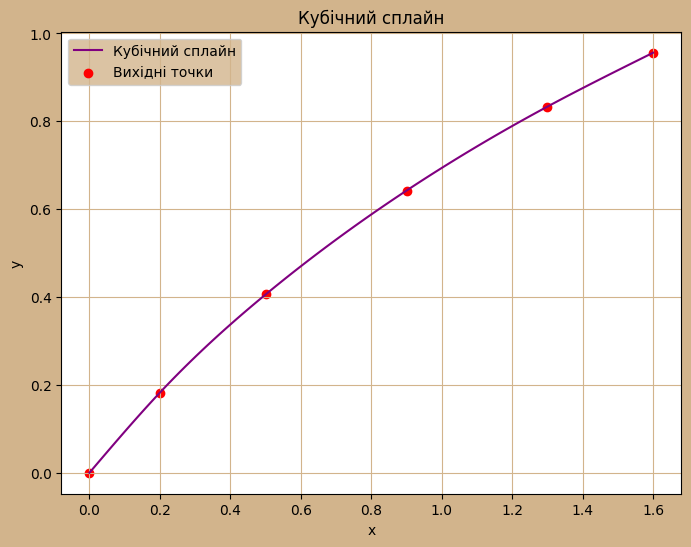

In [181]:
n = len(x) - 1
h = np.diff(x)
a = y
b = np.zeros(n)
d = np.zeros(n)
c = np.zeros(n + 1)

alpha = np.zeros(n)
for i in range(1, n):
    alpha[i] = 3*(((a[i+1] - a[i])/h[i]) - ((a[i] - a[i-1])/h[i-1]))

l = np.ones(n + 1)
mu = np.zeros(n)
z = np.zeros(n + 1)

for i in range(1, n):
    l[i] = 2 * (x[i+1] - x[i-1]) - h[i-1] * mu[i-1]
    mu[i] = h[i] / l[i]
    z[i] = (alpha[i] - h[i-1] * z[i-1]) / l[i]

l[n] = 1
z[n] = 0
c[n] = 0

for j in range(n-1, -1, -1):
    c[j] = z[j] - mu[j] * c[j+1]
    b[j] = (a[j+1] - a[j]) / h[j] - h[j] * (c[j+1] + 2 * c[j]) / 3
    d[j] = (c[j+1] - c[j]) / (3 * h[j])

for i in range(n):
    print(f"Відрізок {i+1}:")
    print(f"S_{i}(x) = {a[i]} + {b[i].round(4)}(x - {x[i]}) + {c[i].round(4)}(x - {x[i]})^2 + {d[i].round(4)}(x - {x[i]})^3, x належить [{x[i]}, {x[i+1]}]")

x_values = np.linspace(np.min(x), np.max(x), 101)
y_values = [ ]

for i in range(n):
    mask = (x_values >= x[i]) & (x_values <= x[i + 1])
    x_interval = x_values[mask]
    y_interval = a[i] + b[i] * (x_interval - x[i]) + c[i] * (x_interval - x[i]) ** 2 + d[i] * (x_interval - x[i]) ** 3
    y_values.extend(y_interval)

plt.figure(figsize=(8, 6),facecolor="tan",edgecolor="brown")
plt.plot(x_values, y_values, label="Кубічний сплайн", color="purple")
plt.scatter(x, y, color="red", label="Вихідні точки")
plt.title('Кубічний сплайн')
plt.xlabel("x")
plt.ylabel("y")
plt.legend(facecolor='tan')
plt.grid(True,c='tan')
plt.show()